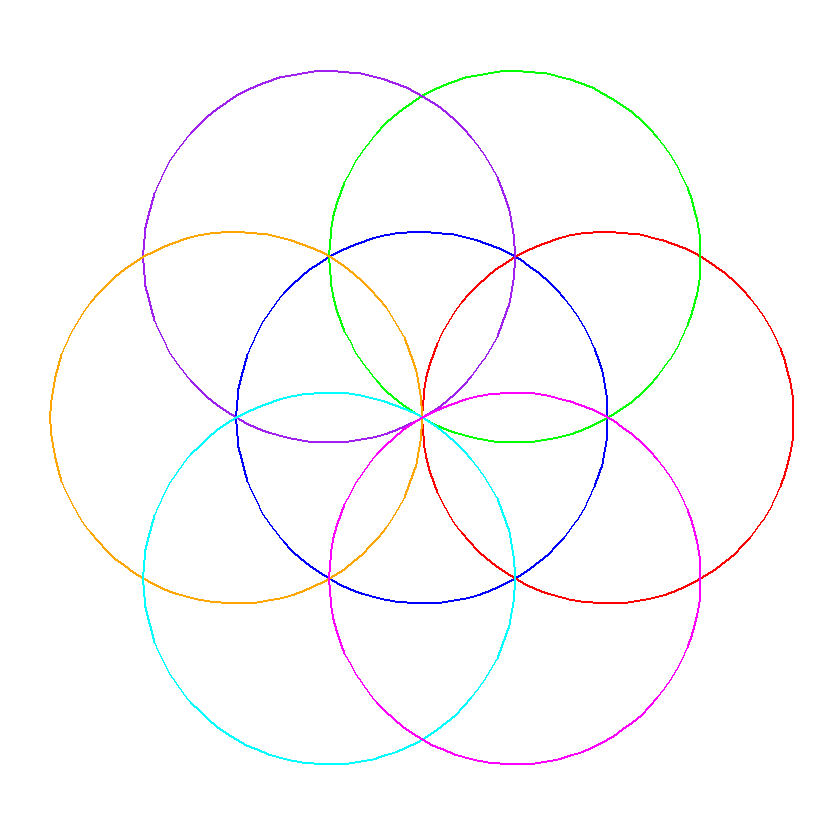

In [2]:
# Load required library
library(ggplot2)

# Function to generate points for a circle
circle_points <- function(center_x, center_y, radius, n_points = 100) {
  t <- seq(0, 2 * pi, length.out = n_points)
  x <- center_x + radius * cos(t)
  y <- center_y + radius * sin(t)
  data.frame(x = x, y = y)
}

# Parameters
R <- 50
n_points <- 100

# First circle: centered at (0, 0)
circle1 <- circle_points(0, 0, R, n_points)
circle1$circle <- "Circle 1"

# Six circles around the perimeter, spaced at 60-degree intervals
angles <- seq(0, 2 * pi, by = pi / 3)[-7]  # 0, 60, 120, 180, 240, 300 degrees
circles <- lapply(seq_along(angles), function(i) {
  center_x <- R * cos(angles[i])
  center_y <- R * sin(angles[i])
  data <- circle_points(center_x, center_y, R, n_points)
  data$circle <- paste0("Circle ", i + 1)
  data
})

# Combine data
plot_data <- do.call(rbind, c(list(circle1), circles))

# Plot
ggplot(plot_data, aes(x = x, y = y, color = circle)) +
  geom_path(size = 0.7) +
  scale_color_manual(values = c("Circle 1" = "blue", "Circle 2" = "red", "Circle 3" = "green", 
                                "Circle 4" = "purple", "Circle 5" = "orange", "Circle 6" = "cyan", 
                                "Circle 7" = "magenta")) +
  coord_equal() +
  theme_minimal() +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    legend.position = "none"
  )

Warning message:
"package 'ggplot2' was built under R version 4.4.3"


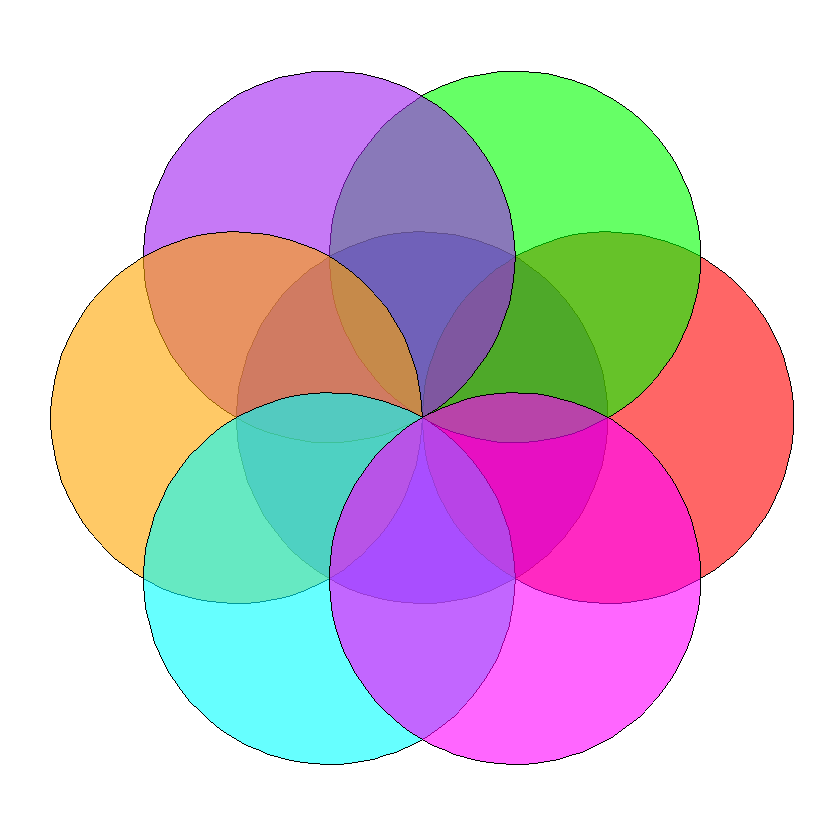

In [1]:
library(ggplot2)

# Function to generate points for a circle (with closed polygon)
circle_points <- function(center_x, center_y, radius, n_points = 100) {
  t <- seq(0, 2 * pi, length.out = n_points)
  x <- center_x + radius * cos(t)
  y <- center_y + radius * sin(t)
  df <- data.frame(x = x, y = y)
  # Ensure the circle is closed
  df <- rbind(df, df[1,])
  return(df)
}

# Parameters
R <- 50
n_points <- 100

# First circle: centered at (0, 0)
circle1 <- circle_points(0, 0, R, n_points)
circle1$circle <- "Circle 1"

# Six circles around the perimeter, spaced at 60-degree intervals
angles <- seq(0, 2 * pi, by = pi / 3)[-7]
circles <- lapply(seq_along(angles), function(i) {
  center_x <- R * cos(angles[i])
  center_y <- R * sin(angles[i])
  data <- circle_points(center_x, center_y, R, n_points)
  data$circle <- paste0("Circle ", i + 1)
  data
})

# Combine data
plot_data <- do.call(rbind, c(list(circle1), circles))

# Plot filled circles
ggplot(plot_data, aes(x = x, y = y, fill = circle, group = circle)) +
  geom_polygon(color = "black", alpha = 0.6) +
  scale_fill_manual(values = c("Circle 1" = "blue", "Circle 2" = "red", "Circle 3" = "green", 
                               "Circle 4" = "purple", "Circle 5" = "orange", "Circle 6" = "cyan", 
                               "Circle 7" = "magenta")) +
  coord_equal() +
  theme_minimal() +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    legend.position = "none"
  )


Warning message:
"package 'dplyr' was built under R version 4.4.3"



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




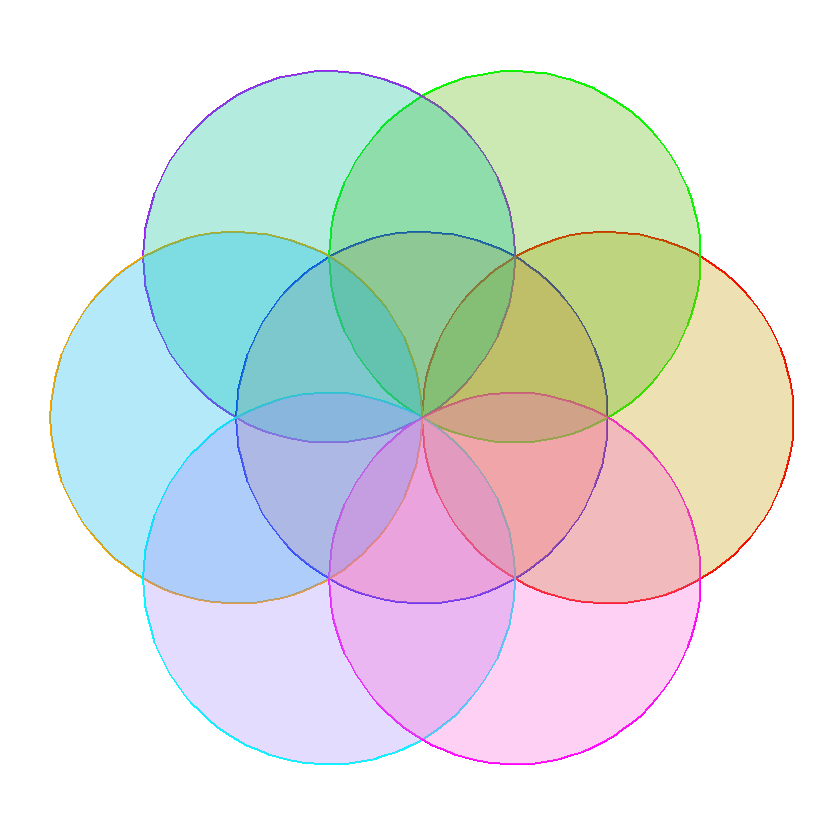

In [5]:
library(ggplot2)
library(dplyr)

# Function to generate points for a circle
circle_points <- function(center_x, center_y, radius, n_points = 100) {
  t <- seq(0, 2 * pi, length.out = n_points)
  x <- center_x + radius * cos(t)
  y <- center_y + radius * sin(t)
  data.frame(x = x, y = y)
}

# Parameters
R <- 50
n_points <- 100

# First circle: centered at (0, 0)
circle1 <- circle_points(0, 0, R, n_points)
circle1$circle <- "Circle 1"

# Six circles around the perimeter, spaced at 60-degree intervals
angles <- seq(0, 2 * pi, by = pi / 3)[-7]  # 0, 60, 120, 180, 240, 300 degrees
circles <- lapply(seq_along(angles), function(i) {
  center_x <- R * cos(angles[i])
  center_y <- R * sin(angles[i])
  data <- circle_points(center_x, center_y, R, n_points)
  data$circle <- paste0("Circle ", i + 1)
  data
})

# Combine data
plot_data <- do.call(rbind, c(list(circle1), circles))

# Plot with filling each area between the circles
ggplot(plot_data, aes(x = x, y = y, color = circle)) +
  geom_path(size = 0.7) +
  scale_color_manual(values = c("Circle 1" = "blue", "Circle 2" = "red", "Circle 3" = "green", 
                                "Circle 4" = "purple", "Circle 5" = "orange", "Circle 6" = "cyan", 
                                "Circle 7" = "magenta")) +
  coord_equal() +
  theme_minimal() +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    legend.position = "none"
  ) +
  geom_polygon(data = plot_data, aes(x = x, y = y, fill = circle), 
               alpha = 0.3, color = NA)  # Adding colored areas between circles
